In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
5,6,0,3,male,NaN,0,0,8.4583
6,7,0,1,male,54.0,0,0,51.8625
7,8,0,3,male,2.0,3,1,21.0750
8,9,1,3,female,27.0,0,2,11.1333
9,10,1,2,female,14.0,1,0,30.0708


In [3]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data = pd.get_dummies(data,columns = ['Sex','Pclass'])
y = data['Survived']
x = data.drop(['Survived','PassengerId'],axis = 1,errors = 'ignore')
x

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
615,24.0,1,2,65.0000,1,0,0,1,0
616,34.0,1,1,14.4000,0,1,0,0,1
617,26.0,1,0,16.1000,1,0,0,0,1
618,4.0,2,1,39.0000,1,0,0,1,0


In [4]:
min_x = x.min()
max_x = x.max()
x = (x - min_x)/(max_x - min_x)
x

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.302491,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.530249,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,0.359431,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.487544,0.125,0.0,0.103644,1.0,0.0,1.0,0.0,0.0
4,0.487544,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
615,0.330961,0.125,0.4,0.126872,1.0,0.0,0.0,1.0,0.0
616,0.473310,0.125,0.2,0.028107,0.0,1.0,0.0,0.0,1.0
617,0.359431,0.125,0.0,0.031425,1.0,0.0,0.0,0.0,1.0
618,0.046263,0.250,0.2,0.076123,1.0,0.0,0.0,1.0,0.0


In [5]:
#sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias) #h_theta_x

# Error (log-loss) formula
def error_formula(y, output):
    return -np.dot(y.T,np.log(output))-np.dot(1-y.T,np.log(1-output)) #cost function

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    yhat=output_formula(x,weights,bias)
    weights=weights+learnrate*np.dot(x.T,y-yhat)
    bias=bias+learnrate*np.sum(y-yhat)
    return weights,bias
def accuracy(yhat,y):
    return np.sum(yhat == y)*100/yhat.shape[0]

In [6]:
np.random.seed(44)
def train(x, y, epochs, learnrate):
    errors = []
    n_records, n_features = x.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        weights, bias = update_weights(x, y, weights, bias, learnrate)
        out = output_formula(x, weights, bias)
        loss = np.mean(error_formula(y, out))
        errors.append(loss)
    return errors,weights,bias
def plot_error(errors):
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

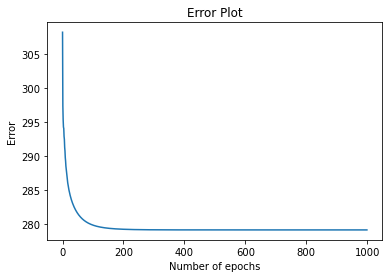

In [7]:
errors,final_weights,bias = train(x, y, 1000, 0.01)
plot_error(errors)

In [8]:
test_data = pd.read_csv('../data/test.csv')
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data = pd.get_dummies(test_data,columns = ['Sex','Pclass'])
test_y = test_data['Survived']
test_x = test_data.drop(['Survived','PassengerId'],axis = 1,errors = 'ignore')
test_x = (test_x - min_x)/(max_x - min_x)

In [9]:
test_out = output_formula(test_x,final_weights,bias)
test_pred = test_out > 0.5

In [10]:
print("TEST SET")
print(f"Accuracy = {accuracy(test_pred,test_y):0.2f}%")
tp=np.sum(test_pred&test_y)
precision=tp/np.sum(test_pred)
recall=tp/np.sum(test_y)
f1=2*tp/(np.sum(test_y)+np.sum(test_pred))
print(f"Precision= {precision:.2f}")# precision=tp/(tp+fp)
print(f"Recall= {recall:.2f}")#recall=tp/(tp+fn)
print(f"F1 Score= {f1:.2f}")#f1=2*precision*recall/(precision+recall)
print(f"Loss={error_formula(test_y,test_out):0.2f}")

TEST SET
Accuracy = 80.44%
Precision= 0.78
Recall= 0.63
F1 Score= 0.70
Loss=118.62


In [11]:

train_x = x
train_y=y
train_out = output_formula(train_x,final_weights,bias)
train_pred = train_out > 0.5
print("TRAIN SET")
print(f"Accuracy = {accuracy(train_pred,train_y):0.2f}%")
tp=np.sum(train_pred&train_y)
precision=tp/np.sum(train_pred)
recall=tp/np.sum(train_y)
f1=2*tp/(np.sum(train_y)+np.sum(train_pred))
print(f"Precision= {precision:.2f}")
print(f"Recall= {recall:.2f}")
print(f"F1 Score= {f1:.2f}")
print(f"Loss={error_formula(train_y,train_out):0.2f}")

TRAIN SET
Accuracy = 80.48%
Precision= 0.78
Recall= 0.70
F1 Score= 0.74
Loss=279.09
